In [11]:
import pandas as pd
import re
df=pd.read_csv("scores_data.csv")
print(df.head())

       Batch  User_ID     Score   
0  AI_ELITE_7  uid_149       6 / 7
1  AI_ELITE_7  uid_148       6 / 7
2  AI_ELITE_7  uid_147       7 / 7
3  AI_ELITE_7  uid_146       7 / 7
4  AI_ELITE_7  uid_145       4 / 7


In [12]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Batch', 'User_ID', 'Score'], dtype='object')


In [13]:
def split(text):
    numbers = re.findall(r'\d+', text)
    return int(numbers[0]), int(numbers[1])

df[['obtained','total']] = df['Score'].apply(
    lambda x: pd.Series(split(x)))

In [14]:
df['percentage'] = (df['obtained'] / df['total']) * 100
print(df.head())


        Batch  User_ID  Score  obtained  total  percentage
0  AI_ELITE_7  uid_149  6 / 7         6      7   85.714286
1  AI_ELITE_7  uid_148  6 / 7         6      7   85.714286
2  AI_ELITE_7  uid_147  7 / 7         7      7  100.000000
3  AI_ELITE_7  uid_146  7 / 7         7      7  100.000000
4  AI_ELITE_7  uid_145  4 / 7         4      7   57.142857


In [15]:
df.groupby('Batch')['percentage'].describe()


,count,mean,std,min,25%,50%,75%,max
Batch,,,,,,,,
AI_ELITE_4,48.0,54.166667,20.619652,0.000000,42.857143,57.142857,60.714286,100.0
AI_ELITE_6,48.0,60.416667,23.434869,0.000000,42.857143,57.142857,71.428571,100.0
AI_ELITE_7,53.0,72.237197,20.666883,28.571429,57.142857,71.428571,85.714286,100.0


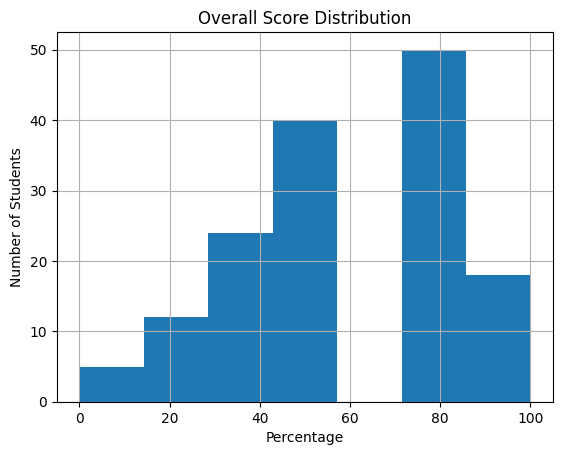

In [16]:
import matplotlib.pyplot as plt

df['percentage'].hist(bins=7)
plt.xlabel("Percentage")
plt.ylabel("Number of Students")
plt.title("Overall Score Distribution")
plt.show()


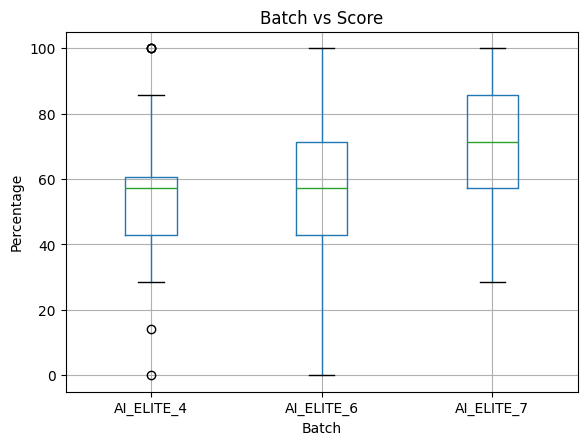

In [18]:
df.boxplot(column='percentage', by='Batch')
plt.xlabel("Batch")
plt.ylabel("Percentage")
plt.title("Batch vs Score")
plt.suptitle("")
plt.show()
